In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
plt.style.use("ggplot")
color_cycle = plt.rcParams['axes.color_cycle']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [3]:
df = pd.read_csv("../Datasets/BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
# unique values among columns
counts = pd.Series(dict(map(lambda c: (c, len(df[c].unique())), df.columns)))
display(counts)

Age                               7
City_Category                     3
Gender                            2
Marital_Status                    2
Occupation                       21
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Product_ID                     3623
Purchase                      17959
Stay_In_Current_City_Years        5
User_ID                        5891
dtype: int64

In [6]:
# basic statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


---

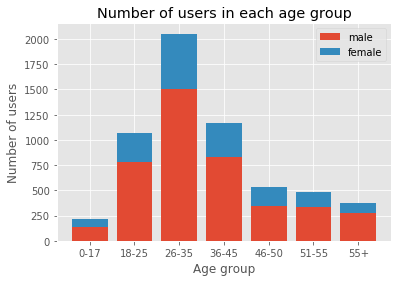

In [90]:
# age groups + gender (stacked)
age_categories = sorted(df['Age'].unique())
male_users_per_age = list(map(lambda age: len(df[(df['Age'] == age) & (df['Gender'] == 'M')]['User_ID'].unique()), age_categories))
female_users_per_age = list(map(lambda age: len(df[(df['Age'] == age) & (df['Gender'] == 'F')]['User_ID'].unique()), age_categories))

x = range(len(age_categories))
plt.bar(x, male_users_per_age, label='male')
plt.bar(x, female_users_per_age, label='female', bottom=male_users_per_age)

plt.xticks(range(len(age_categories)), age_categories)
plt.xlabel('Age group')
plt.ylabel('Number of customers')
plt.title('Number of customers in each age group')
plt.legend()
plt.show()

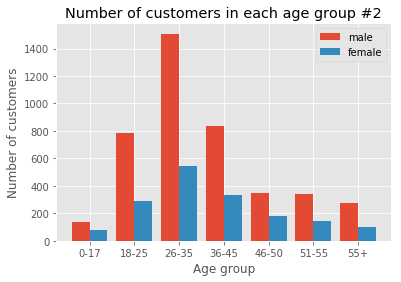

In [184]:
# age groups + gender
age_categories = sorted(df['Age'].unique())
male_users_per_age = list(map(lambda age: len(df[(df['Age'] == age) & (df['Gender'] == 'M')]['User_ID'].unique()), age_categories))
female_users_per_age = list(map(lambda age: len(df[(df['Age'] == age) & (df['Gender'] == 'F')]['User_ID'].unique()), age_categories))

x = np.arange(len(age_categories))
w = 0.4
plt.bar(x-w/2, male_users_per_age, w, label='male')
plt.bar(x+w/2, female_users_per_age, w, label='female')

plt.xticks(range(len(age_categories)), age_categories)
plt.xlabel('Age group')
plt.ylabel('Number of customers')
plt.title('Number of customers in each age group #2')
plt.legend()
plt.show()

---

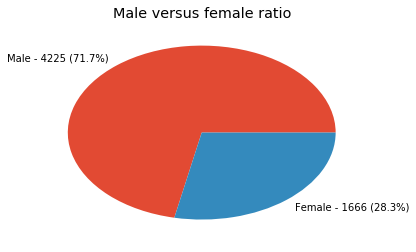

In [355]:
# Male vs female ratio
male_count = len(df[df['Gender'] == 'M']['User_ID'].unique())
female_count = len(df[df['Gender'] == 'F']['User_ID'].unique())
total = len(df['User_ID'].unique())
labels = ['Male - {} ({:.1f}%)'.format(male_count, male_count / total * 100), 
         'Female - {} ({:.1f}%)'.format(female_count, female_count / total * 100)]
plt.pie([male_count, female_count], labels=labels)
plt.title("Male versus female ratio")
plt.show()

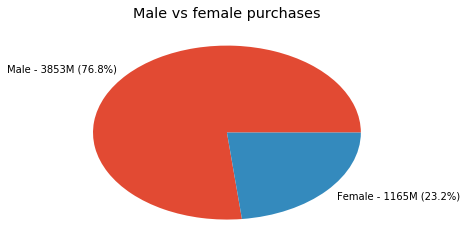

In [360]:
# Male vs female purchases
units = 10**6
male_purchase_sum = df[df['Gender'] == 'M']['Purchase'].sum() / units
female_purchase_sum = df[df['Gender'] == 'F']['Purchase'].sum() / units
total = df['Purchase'].sum() / units
labels = ['Male - {:.0f}M ({:.1f}%)'.format(male_purchase_sum, male_purchase_sum / total * 100), 
         'Female - {:.0f}M ({:.1f}%)'.format(female_purchase_sum, female_purchase_sum / total * 100)]
plt.pie([male_purchase_sum, female_purchase_sum], labels=labels)
plt.title("Male vs female purchases")
plt.show()

---

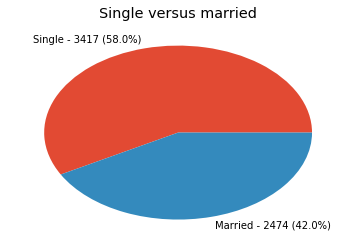

In [357]:
# single vs married ratio
single_count = len(df[df['Marital_Status'] == 0]['User_ID'].unique())
married_count = len(df[df['Marital_Status'] == 1]['User_ID'].unique())
total = len(df['User_ID'].unique())
labels = ['Single - {} ({:.1f}%)'.format(single_count, single_count / total * 100), 
         'Married - {} ({:.1f}%)'.format(married_count, married_count / total * 100)]
plt.pie([single, married], labels=labels)
plt.title("Single versus married")
plt.show()

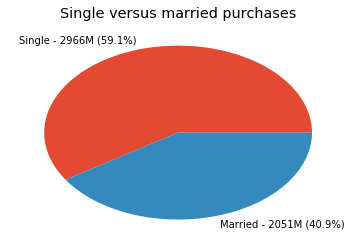

In [354]:
# Single vs married purchases
units = 10**6
single_purchase_sum = df[df['Marital_Status'] == 0]['Purchase'].sum() / units
married_purchase_sum = df[df['Marital_Status'] == 1]['Purchase'].sum() / units
total = df['Purchase'].sum() / units
labels = ['Single - {:.0f}M ({:.1f}%)'.format(single_purchase_sum, single_purchase_sum / total * 100), 
         'Married - {:.0f}M ({:.1f}%)'.format(married_purchase_sum, married_purchase_sum / total * 100)]
plt.pie([single_purchase_sum, married_purchase_sum], labels=labels)
plt.title("Single versus married purchases")
plt.show()

---

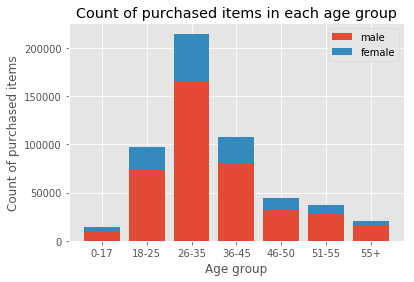

In [4]:
# Purchased items in each age group
age_categories = sorted(df['Age'].unique())
male_purchases_per_age = list(map(lambda age: len(df[(df['Age'] == age) & (df['Gender'] == 'M')]), age_categories))
female_purchases_per_age = list(map(lambda age: len(df[(df['Age'] == age) & (df['Gender'] == 'F')]), age_categories))

x = range(len(age_categories))
plt.bar(x, male_purchases_per_age, label='male')
plt.bar(x, female_purchases_per_age, label='female', bottom=male_purchases_per_age)
plt.xticks(range(len(age_categories)), age_categories)
plt.xlabel('Age group')
plt.ylabel('Count of purchased items')
plt.title('Count of purchased items in each age group')
plt.legend()
plt.show()

---

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


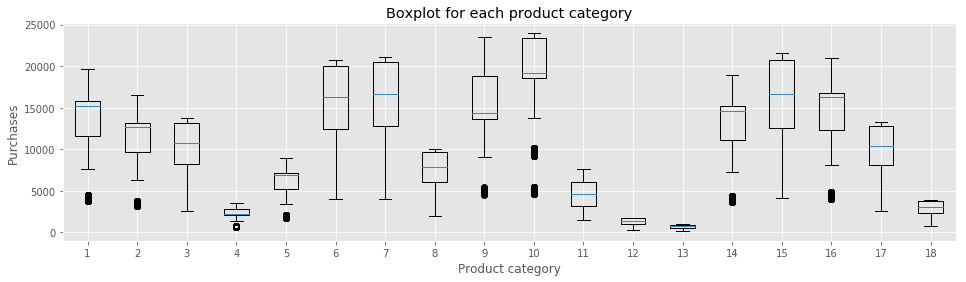

In [15]:
# check how cheap/expensive each product category is
product_categories = sorted(df['Product_Category_1'].unique())
purchased_products_per_product_category = list(map(lambda cat: df[df['Product_Category_1'] == cat]['Purchase'], product_categories))

f, ax = plt.subplots(figsize=(16, 4)) 
plt.boxplot(purchased_products_per_product_category)
plt.xlabel('Product category')
plt.ylabel('Purchases')
plt.title('Price distribution for each product category')
plt.show()

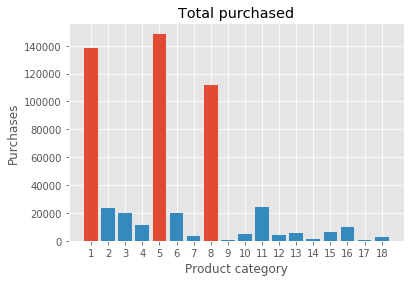

In [14]:
# favourite product categories - counts
product_categories = sorted(df['Product_Category_1'].unique())
purchased_products_per_product_category = list(map(lambda cat: len(df[df['Product_Category_1'] == cat]), product_categories))
colors = list(map(lambda x: color_cycle[0] if x > 100_000 else color_cycle[1], purchased_products_per_product_category))
x = range(len(product_categories))
plt.bar(x, purchased_products_per_product_category, color=colors)
plt.xticks(range(len(product_categories)), product_categories)
plt.xlabel('Product category')
plt.ylabel('Purchases')
plt.title('Total purchased')
plt.show()

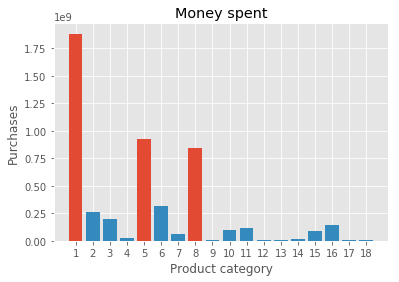

In [368]:
# favourite product categories - money spent
product_categories = sorted(df['Product_Category_1'].unique())
purchased_products_per_product_category = list(map(lambda cat: sum(df[df['Product_Category_1'] == cat]['Purchase']), product_categories))
colors = list(map(lambda x: color_cycle[0] if x > 500_000_000 else color_cycle[1], purchased_products_per_product_category))
x = range(len(product_categories))
plt.bar(x, purchased_products_per_product_category, color=colors)
plt.xticks(range(len(product_categories)), product_categories)
plt.xlabel('Product category')
plt.ylabel('Purchases')
plt.title('Money spent')
plt.show()

In [156]:
# closer look to top purchased products
#sorted(df.groupby('Product_ID')['Product_ID'].count(), reverse=True)
# nothing interesting

---

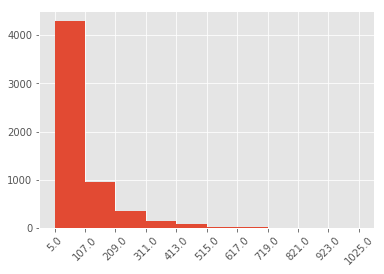

In [306]:
user_purchases = sorted(df.groupby('User_ID')['Purchase'].count().values)
n, bins, patches = plt.hist(user_purchases)
plt.xticks(bins, bins, rotation=45)
plt.show()

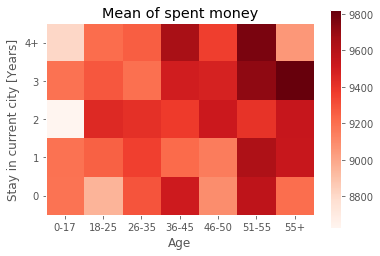

In [318]:
# Mean of spent money Age vs Stay_In_Current_City_Years
pivot_table = pd.pivot_table(df, values="Purchase", index="Stay_In_Current_City_Years", columns="Age", aggfunc=np.mean)
fig, ax = plt.subplots()
im = ax.imshow(pivot_table, cmap='Reds', origin='left')
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_xlabel("Age")
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_ylabel("Stay in current city [Years]")
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)
plt.title('Mean of spent money')
plt.show()

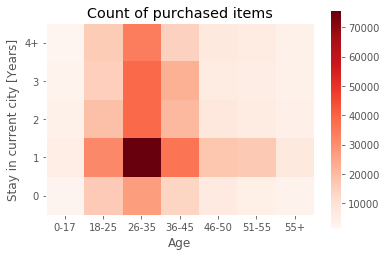

In [319]:
# Count of purchased items Age vs Stay_In_Current_City_Years
pivot_table = pd.pivot_table(df, values="Purchase", index="Stay_In_Current_City_Years", columns="Age", aggfunc=len)
fig, ax = plt.subplots()
im = ax.imshow(pivot_table, cmap='Reds', origin='left')
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_xlabel("Age")
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_ylabel("Stay in current city [Years]")
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)
plt.title('Count of purchased items')
plt.show()

---

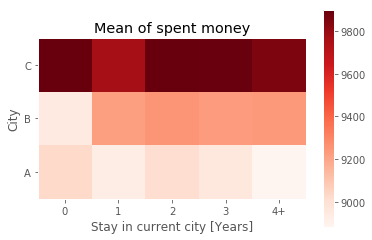

In [337]:
# Mean of spent money City_Category vs Stay_In_Current_City_Years
pivot_table = pd.pivot_table(df, values="Purchase", index="City_Category", columns="Stay_In_Current_City_Years", aggfunc=np.mean)
fig, ax = plt.subplots()
im = ax.imshow(pivot_table, cmap='Reds', origin='left')
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_xlabel("Stay in current city [Years]")
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_ylabel("City")
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)
plt.title('Mean of spent money')
plt.show()

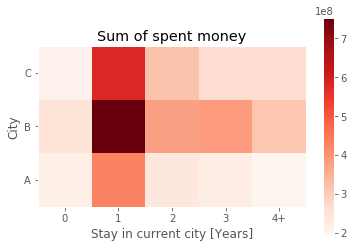

In [342]:
# Sum of spent money City_Category vs Stay_In_Current_City_Years
pivot_table = pd.pivot_table(df, values="Purchase", index="City_Category", columns="Stay_In_Current_City_Years", aggfunc=np.sum)
fig, ax = plt.subplots()
im = ax.imshow(pivot_table, cmap='Reds', origin='left')
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_xlabel("Stay in current city [Years]")
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_ylabel("City")
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)
plt.title('Sum of spent money')
plt.show()

---

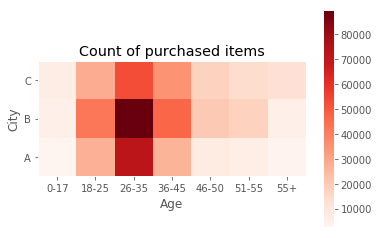

In [363]:
# Count of purchased items Age vs Stay_In_Current_City_Years
pivot_table = pd.pivot_table(df, values="Purchase", index="City_Category", columns="Age", aggfunc=len)
fig, ax = plt.subplots()
im = ax.imshow(pivot_table, cmap='Reds', origin='left')
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_xlabel("Age")
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_ylabel("City")
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)
plt.title('Count of purchased items')
plt.show()

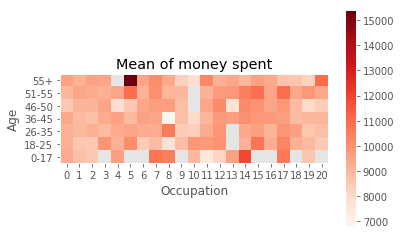

In [343]:
# Mean of spent money Age vs Occupation heatmap
pivot_table = pd.pivot_table(df, values="Purchase", index="Age", columns="Occupation", aggfunc=np.mean)
fig, ax = plt.subplots()
im = ax.imshow(pivot_table, cmap='Reds', origin='left')
fig.colorbar(im, ax=ax)
ax.grid(False)
ax.set_xlabel("Occupation")
ax.set_xticks(range(len(pivot_table.columns)))
ax.set_xticklabels(pivot_table.columns)
ax.set_ylabel("Age")
ax.set_yticks(range(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)
plt.title('Mean of money spent')
plt.show()

In [186]:
# closer look on top combination
df[(df['Age'] == '55+') & (df['Occupation'] == 5)].groupby('User_ID')['Purchase'].sum()
# User_ID = 1002388

User_ID
1002388    231198
Name: Purchase, dtype: int64

In [185]:
# closer look on second top combination
df[(df['Age'] == '0-17') & (df['Occupation'] == 14)].groupby('User_ID')['Purchase'].sum()
# User_ID = 899524 and 181339

User_ID
1001468    899524
1004431    181339
Name: Purchase, dtype: int64

---

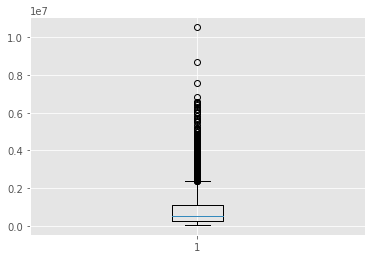

In [202]:
# 80/20 rule check (Pareto principle)
# distribution of user's purchases
purchases_per_user = df.groupby('User_ID')['Purchase'].sum()

purchases_per_user_result = plt.boxplot(purchases_per_user)
plt.show()

"""
# get the most valuable purchasers
top_purchases = purchases_per_user_result['fliers'][0].get_data()
top_purchases = top_purchases[0] * top_purchases[1] # 0=count, 1=value
top_purchases_count = len(top_purchases)
top_purchases_total = top_purchases.sum()
# rest of the purchasers
#rest_purchases = purchases_per_user_result[]
"""

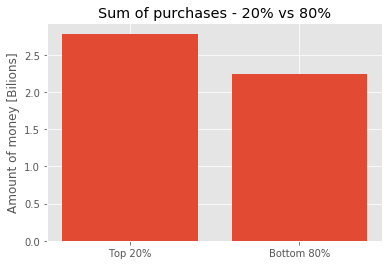

In [271]:
sorted_purchases_per_user = sorted(purchases_per_user, reverse=True)
n = len(sorted_purchases_per_user)
n20 = n // 5
top20 = sorted_purchases_per_user[:n20]
bottom80 = sorted_purchases_per_user[n20:]

x = [0, 1]
unit = 1_000_000_000
y = np.array([sum(top20), sum(bottom80)]) / unit
plt.bar(x, y)
plt.xticks(x, ['Top 20%', 'Bottom 80%'])
plt.ylabel('Amount of money [Bilions]')
plt.title('Sum of purchases - 20% vs 80%')
plt.show()

# Results
- Male spent more money than female.
- Single spent more money than married.
- Older people are more likely to spend more money.
- Customers from city B spent overall more money but customers from city C spent more in average.
- Customers 26-35 spent the most then 36-45 and then 18-25.
- Top 20% customers spent more than the rest of the customers.
- Products from categories 1, 5 and 8 were purchased the most (about 10 times more than the rest).
- Products from category 1 provided majority of money followed by products from categories 5 and 8. However products from 5 and 8 provided about half less money!

---

---

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [69]:
# preprocessing
dfa = pd.DataFrame()
# try pd.get_dummies or sklearn.OneHotEncoder
# try pd.factorize or sklearn.LabelEncoder

dfa['Gender'] = pd.factorize(df['Gender'])[0]
dfa['Age'] = pd.factorize(df['Age'])[0]
dfa['Occupation'] = df['Occupation']
dfa['City_Category'] = pd.factorize(df['City_Category'])[0]
dfa['Stay_In_Current_City_Years'] = pd.factorize(df['Stay_In_Current_City_Years'])[0]
dfa['Marital_Status'] = df['Marital_Status']
dfa['Product_Category_1'] = df['Product_Category_1']
dfa['Purchase'] = df['Purchase']

In [99]:
train, test = train_test_split(dfa, train_size=10000, random_state=42)
validation, test = train, test = train_test_split(test, train_size=10000, random_state=42)

display(train.shape)
display(validation.shape)
display(test.shape)

def split_xy(data):
    return (data.drop('Purchase', axis=1), data['Purchase'])

train_x, train_y = split_xy(train)
validation_x, validation_y = split_xy(validation)
test_x, test_y = split_xy(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(10000, 8)

(10000, 8)

(517577, 8)

In [135]:
n_estimators = list(range(1, 50))
max_depths = [3, 5, 6, 7, 8, 9, 10, 11, 15, 30, 50]
all_scores = []

for max_depth in max_depths:
    scores = []
    for n in n_estimators:
        model = RandomForestRegressor(n_estimators=n, criterion='mse', max_depth=max_depth, n_jobs=4, random_state=42)

        model.fit(train_x, train_y)

        scores.append(model.score(test_x, test_y))
    all_scores.append(scores)

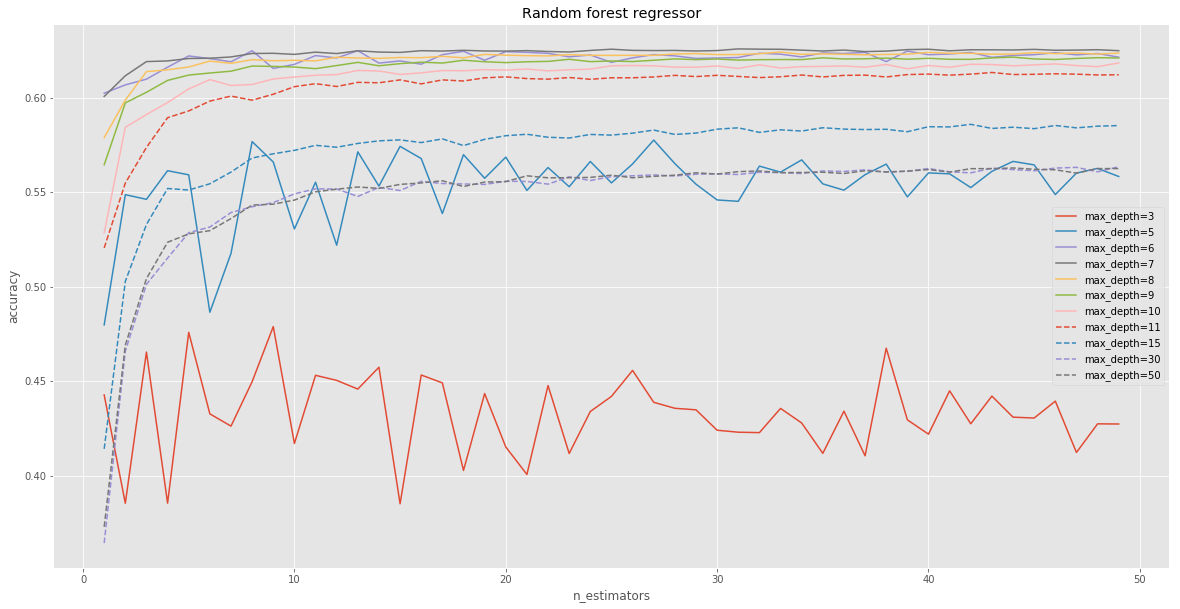

In [151]:
plt.subplots(figsize=(20, 10)) 
for i, max_depth in enumerate(max_depths):
    plt.plot(n_estimators, all_scores[i], '-' if i < 7 else '--', label="max_depth={}".format(max_depth))
plt.title("Random forest regressor")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()